# ขั้นตอนการ import ข้อมูล

ทำการ import numpy และ pandas ในการจัดการกับข้อมูลที่เป็น array และ dataframe

และทำการ import warnings มาเพื่อทำการเสร็จ wanings ให้เป็น ignore (จะไม่แสดง warnings ต่าง ๆ)


In [ ]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

ทำการอ่านข้อมูล โดยข้อมูลจะเก็บไว้บน google drive จึงทำการหาข้อมูลผ่าน path บน google drive มีการกำหนดตัว separator เป็น semicolon เนื่องจากชุดข้อมูลมีการคั่นด้วยเครื่องหมายนี้ 

หากต้องการชุดข้อมูลเพื่อทดลอง สามารถเข้าไป download ได้ผ่านลิงก์ github ด้านล่างนี้

htttps://

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/CS/CS345/Dataset/airplane_classification_preprocess_train.csv', sep=';')
test = pd.read_csv('/content/drive/MyDrive/CS/CS345/Dataset/airplane_classification_preprocess_test.csv', sep=';')

หลังจากอ่านข้อมูลเสร็จ ทำการ print ข้อมูลโดยใช้ฟังก์ชัน info() ในการดูข้อมูลพื้นฐานในชุดข้อมูล

In [ ]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender = Female                    8000 non-null   float64
 1   Gender = Male                      8000 non-null   float64
 2   Customer Type = Loyal Customer     8000 non-null   float64
 3   Customer Type = disloyal Customer  8000 non-null   float64
 4   Type of Travel = Business travel   8000 non-null   float64
 5   Type of Travel = Personal Travel   8000 non-null   float64
 6   Class = Eco                        8000 non-null   float64
 7   Class = Business                   8000 non-null   float64
 8   Class = Eco Plus                   8000 non-null   float64
 9   Age                                8000 non-null   float64
 10  Flight Distance                    8000 non-null   float64
 11  Inflight wifi service              8000 non-null   float

จะเห็นได้ว่าในคอลัม satisfaction เป็น object อยู่ ซึ่งในการทำ Model ค่าจำเป็นต้องเป็นตัวเลข ดังนั้นจึงทำการแปลงข้อมูลในคอลัมน์ satisfaction ให้เป็นตัวเลข โดยใช้คำสั่ง replace แปลงแถวที่มีค่าเป็น satisfied แปลงเป็น 0 และแปลงแถวที่มีค่าเป็น neutral or dissatisfied แปลงเป็น 1

In [ ]:
train['satisfaction'].replace({'satisfied':0, 'neutral or dissatisfied':1}, inplace = True)
test['satisfaction'].replace({'satisfied':0, 'neutral or dissatisfied':1}, inplace = True)

หลังจากแปลงแล้ว ทำการตรวจสอบอีกรอบว่าคอลัมน์ satisfaction ได้แปลงเป็นตัวเลขแล้วหรือยัง

In [ ]:
print(train.info())
print()
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender = Female                    8000 non-null   float64
 1   Gender = Male                      8000 non-null   float64
 2   Customer Type = Loyal Customer     8000 non-null   float64
 3   Customer Type = disloyal Customer  8000 non-null   float64
 4   Type of Travel = Business travel   8000 non-null   float64
 5   Type of Travel = Personal Travel   8000 non-null   float64
 6   Class = Eco                        8000 non-null   float64
 7   Class = Business                   8000 non-null   float64
 8   Class = Eco Plus                   8000 non-null   float64
 9   Age                                8000 non-null   float64
 10  Flight Distance                    8000 non-null   float64
 11  Inflight wifi service              8000 non-null   float

จะเห็นได้ว่า คอลัมน์ satisfaction ได้แปลงเป็นตัวเลขหมดแล้ว

ทำการ print ดูข้อมูลว่ามีกี่มิติ มี shape ยังไง และมีจำนวนข้อมูลทั้งหมดเท่าไหร่

In [ ]:
print("train ndim: ", train.ndim)
print("train shape:", train.shape)
print("train size: ", train.size)
print()
print("test ndim: ", test.ndim)
print("test shape:", test.shape)
print("test size: ", test.size)

train ndim:  2
train shape: (8000, 28)
train size:  224000

test ndim:  2
test shape: (2000, 28)
test size:  56000


ลักษณะในชุดข้อมูล 10,000 แถว มีดังนี้

*   เป็น array 2 มิติ
*   มีแถว 10,000 แถว
*   มีคอลัมน์ 28 คอลัมน์
*   มีข้อมูลทั้งหมด 280,000 ข้อมูล

ลักษณะในชุดข้อมูล train มีดังนี้

*   เป็น array 2 มิติ
*   มีแถว 8,000 แถว
*   มีคอลัมน์ 28 คอลัมน์
*   มีข้อมูลทั้งหมด 224,000 ข้อมูล

ลักษณะในชุดข้อมูล test มีดังนี้

*   เป็น array 2 มิติ
*   มีแถว 2,000 แถว
*   มีคอลัมน์ 28 คอลัมน์
*   มีข้อมูลทั้งหมด 56,000 ข้อมูล

# ขั้นตอนการเตรียมข้อมูล

ต่อมาจะทำการเตรียมข้อมูลเพื่อนำไปใช้ในการทำ Model โดยจะสร้างเป็นข้อมูล data_train กับ data_test ในการทำ cross validation เพื่อหา Model ที่มีประสิทธิภาพดีที่สุด และสร้างชุดข้อมูล X_train กับ Y_train ในการให้ Model ที่ดีที่สุด ได้ฝึกฝนผ่าน X_train และดูเฉลยผ่าน Y_train และสร้างชุดข้อมูล X_test กับ Y_test ไว้ให้ Model ได้ทายข้อมูลใน X_test และใช้ Y_test เป็นเฉลย เพื่อดูประสิทธิภาพอีกที

In [ ]:
X_train = train.iloc[:, 0:26].values
Y_train = train.iloc[:, 27].values

X_test = test.iloc[:, 0:26].values
Y_test = test.iloc[:, 27].values

# ขั้นตอนการเลือก model

ทำการ import Model ที่จะใช้ โดย Model ที่นิยมใช้มีดังนี้

*   1.KNN (k-nearest neighbors) หรือใน python จะใช้ชื่อว่า KNeighborsClassifier
*   2.SVM (Support vector machines) หรือใน python จะใช้ชื่อว่า SVC
*   3.Neural Network หรือใน python จะใช้ชื่อว่า MLPClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

ทำการ import pyplot เพื่อนำมา plot เป็นกราฟ

In [ ]:
import matplotlib.pyplot as plt

ก่อนที่จะทำ cross validation ของแต่ละ model

model ที่จำเป็นต้องหาค่าต่าง ๆ มา set ก่อนนั้นจะมี model KNN และ Neural Network โดยจะเริ่มกันที่ KNN ก่อน

โดย KNN นั้นจำเป็นต้องมีค่า k ในการทำ ซึ่งวิธีการหาที่จะทำคือการหาค่า Error Rate ของค่า k แต่ละค่า ในที่นี้จะทำการวนลูปค่า k ตั้งแต่ 1 จนถึง 50 แล้วนำมา plot graph หากที่ k ไหนมีค่า Error Rate น้อยที่สุด ค่านั้นจะเป็นค่าที่จะนำมาใช้ในการทำ Model ต่อไป

Text(0, 0.5, 'Mean Error')

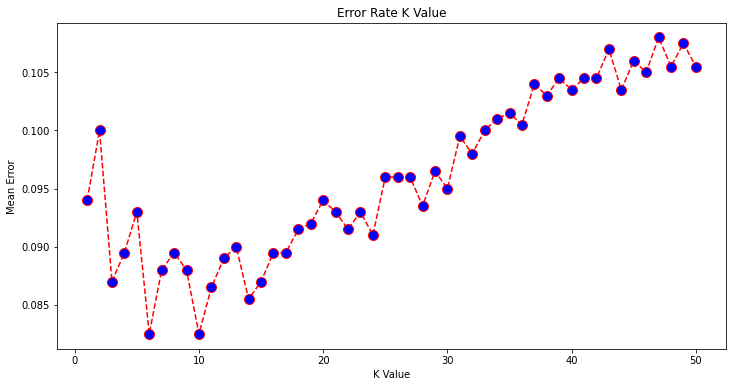

In [ ]:
error = []

for i in range(1, 51):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, Y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != Y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 51), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

หลังจาก plot graph มาแล้ว จะเห็นว่ามีอยู่ 2 ตำแหน่งที่อาจมีค่าต่ำที่สุดอยู่ แต่มองเห็นไม่ชัดจึงทำการวนลูปหาค่า Error Rate ที่น้อยที่สุด

ทำการ import sys เพื่อนำมาใช้ฟังก์ชัน maxsize (ค่าที่มากที่สุดที่เป็นไปได้)

In [ ]:
import sys

In [ ]:
max = sys.maxsize
number_of_kmeans = []
for i in range(50):
  if max > error[i]:
    max = error[i]
for i in range(50):
  if error[i] == max:
    number_of_kmeans.append(i+1)
    print("KNN at", i+1, "have lowest error rate")

KNN at 6 have lowest error rate
KNN at 10 have lowest error rate


หลังจากวนลูปหาค่าที่น้อยที่สุด ซึ่งพบว่า ค่าที่น้อยที่สุดนั้นมีสองค่า จึงใช้ทั้งสองค่าเป็นค่า K นั้นคือ 6 และ 10

หลังจากทราบค่า k ของ KNN ต่อมาจะหาค่าสำหรับ Neural Network 

Neural Network นั้น มีค่าที่กำหนดได้นั้นคือ learning rate, จำนวนรอบ, และ hidden layers โดย ผู้จัดทำ ได้เลือกดังนี้

*   learning rate เป็น 0.01
*   จำนวนรอบ เป็น 200
*   hidden layers เป็น 2 ชั้น โดยชั้นแรกมีขนาด 15 และชั้นที่สองมีขนาด 9

แต่ Model Neural Network ที่ import มา ไม่สามารถกำหนด learning rate ได้ ดังนั้นจึงใช้แค่ จำนวนรอบ กับ hidden layers เท่านั้น

สร้าง models ที่เป็น list มาเพื่อเก็บ model ต่าง ๆ

In [ ]:
models = []

ทำการเพิ่ม Model KNN ที่มีค่า k ตามที่ได้หามา เพิ่มเข้าไปใน list ของ models

In [ ]:
for i in number_of_kmeans:
  name = 'KNN at ' + str(i)
  models.append((name, KNeighborsClassifier(i)))

ทำการเพิ่ม Model SVM เพิ่มเข้าไปใน list ของ models

In [ ]:
models.append(('SVM', SVC(kernel='linear')))

ทำการเพิ่ม Model Neural Network ที่มี จำนวนรอบเท่ากับ 200 และ hiddne layers เป็น (15, 9) ตามที่ได้กำหนดไว้ เพิ่มเข้าไปใน list ของ models

In [ ]:
models.append(('Neural Network', MLPClassifier(solver='lbfgs', max_iter = 200, hidden_layer_sizes=(15, 9), random_state=1)))

ทำการ import cross_val_score เพื่อคำนวณประสิทธิภาพ

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
results = []
names = []
for name, model in models:
  cv_results = cross_val_score(model, X_train, Y_train, cv=10, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

KNN at 6: 0.909000 (0.005750)
KNN at 10: 0.906000 (0.008888)
SVM: 0.869500 (0.010265)
Neural Network: 0.937875 (0.007204)


ผลลัพธ์คือ Model Neural Network มีประสิทธิภาพมากที่สุด ดังนั้นจึงเลือกใช้ Model Neural Network ไปทำ Model

ลองทำ box plot เพื่อเทียบประสิทธิภาพของแต่ละ Model

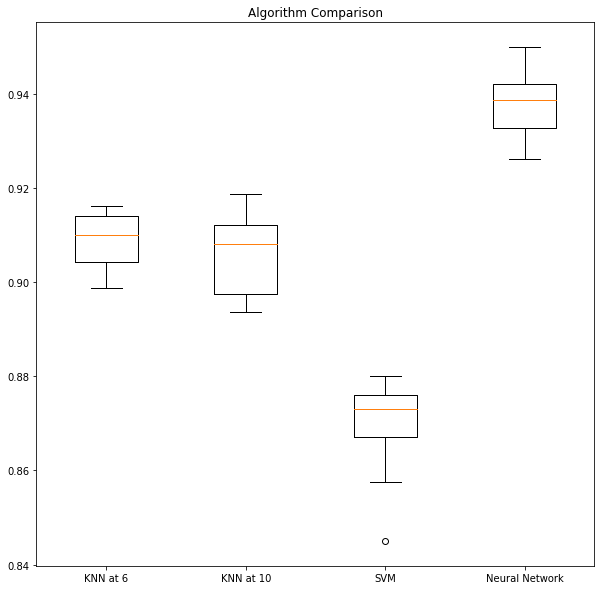

In [ ]:
plt.figure(figsize=(10, 10))
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison');

# ขั้นตอนการจำแนกข้อมูล

หลังจากทราบว่า Model Neural Network มีประสิทธิภาพมากที่สุด จึงนำมา ฝึกฝนกับข้อมูล X_train และ Y_train (มาจากชุดข้อมูล train) ฝึกฝนเสร็จก็ให้ model คาดเดา X_test (มาจากชุดข้อมูล test) โดยนำผลลัพธ์ที่ได้ไปเก็บในตัวแปร Y_pred

In [ ]:
model = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(15, 9), max_iter = 200, random_state=1)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print(Y_pred)

[1 1 0 ... 1 0 1]


ทำการ import accuracy_score, classification_report และ confusion_matrix มาเพื่อตรวจสอบประสิทธิภาพของ Model ว่าทายเป็นอย่างไรบ้าง

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print('Accuracy Score: ',accuracy_score(Y_test, Y_pred))
print()
print('Confusion Matrix')
print(confusion_matrix(Y_test, Y_pred))
print()
print('Classification Report')
print(classification_report(Y_test, Y_pred))

Accuracy Score:  0.939

Confusion Matrix
[[ 836   68]
 [  54 1042]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       904
           1       0.94      0.95      0.94      1096

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000



นำผลที่ Model ทำนายไว้ หรือตัวแปร Y_pred มาทำการหาประสิทธิภาพ โดยดูเฉลยจาก Y_test จะเห็นได้ว่า จาก 2,000 ข้อมูล Model สามารถทำนายถูกได้ถึง 1,878 ข้อมูล หรือมีความแม่นยำอยู่ที่ 0.94 ซึ่งจากผลลัพธ์ประสิทธิภาพที่ทำตอน Cross Validation ที่มีค่าประสิทธิภาพอยู่ที่ 0.93 ทำให้สรุปได้ว่า Model Neural Network ที่ได้ฝึกฝนมานั้น มีประสิทธิภาพที่ยอดเยี่ยม สามารถทำนายข้อมูลให้มีประสิทธิภาพมากกว่าตอนทำ Cross Validation ได้

# รายชื่อผู้จัดทำ

นายภีมภัช พจน์สุนทร รหัสนักศึกษา 6209650081